In [1]:
#Phys427 Assignment 2
#Kai Jin

In [2]:
#We assume f(x,y) = x*y.
#It is divided into 4 parts by x = d, and y = d.
#The range of x and y is both 0 to a
#The A region is right top area of the four region, B is left top, C is right bottom, D is left bottom
#We know data points will lying on the box x = a and y = a with some specific probability. If we increase the event number,
#the probability to get a point in each part will approxiametely to area of part.
#Therefore, A/C = (a-d)*(a-d)/(a-d)*d = B/D

In [1]:
#Get random x and y coordination from 0 to 1
import random
def get_coord(times):
    coord = []
    i = 1
    while (i<=times):
        coord.append([random.random(), random.random()])
        i += 1
    
    return coord

In [2]:
#Seperate x and y coord and return each of them
import numpy as np
def get_xy(coord):
    nArr2D = np.array(coord)
    x = nArr2D[:,0]
    y = nArr2D[:,1]
    
    return x, y

In [11]:
#Make a plot of given points coord
import matplotlib.pyplot as plt
def make_plot(x, y, title):
    plt.plot(x,y,'o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

In [4]:
#Count actual number of points in region A
def count_All(coord, x_division, y_division):
    length = len(coord)
    x, y = get_xy(coord)
    A, B, C, D = 0, 0, 0, 0
    i = 0
    while (i<length):
        if (x[i]>=x_division):
            if (y[i]>=y_division):
                A += 1
            else:
                C += 1
        else:
            if (y[i]>=y_division):
                B += 1
            else:
                D += 1
        i += 1

    return A, B, C, D

In [5]:
#Predict count numbers in area A by data of B, C and D
def predict_A(B, C, D):
    if (D==0):
        pA = float("inf")
    else:
        pA = (B/D)*C
    return pA

In [6]:
#Make a histogram for count numbers of area A
import matplotlib.pyplot as plt
def make_hist(data):
    plt.hist(data)
    plt.title('The histogram of error between real number A and predicted A')
    plt.xlabel('Error')
    plt.ylabel('Times')

Real count numbers of A is 169
Predict count numbers of A is 134.69920844327177
The error is 34.30079155672823


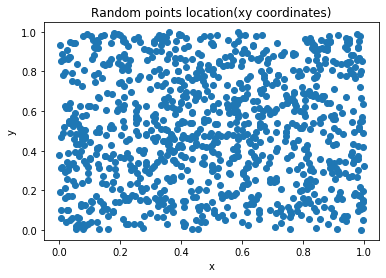

In [14]:
#Q1
coord = get_coord(1000)

x, y = get_xy(coord)

make_plot(x, y, 'Random points location(xy coordinates)')

A, B, C, D = count_All(coord, 0.6, 0.6)

pA = predict_A(B, C, D)

error = abs(A-pA)

print('Real count numbers of A is', A)
print('Predict count numbers of A is',pA)
print('The error is',error)

'\nIt seems like a gaussian distribution. I guess any data which have an equal probability arrange in a specific range will\nlook like gaussian distribution in the end if there are enough samples\n'

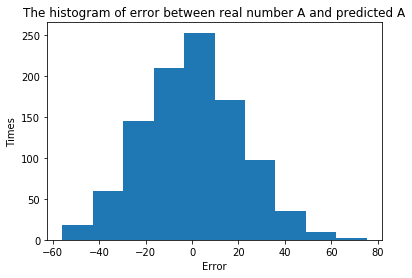

In [8]:
#Q2
repeat = 1000
data = []
i = 1

while (i<=repeat):
    coord = get_coord(1000)

    A, B, C, D = count_All(coord, 0.6, 0.6)

    pA = predict_A(B, C, D)

    data.append(pA-A)
    
    i += 1
    
make_hist(data)

"""
It seems like a gaussian distribution. I guess any data which have an equal probability arrange in a specific range will
look like gaussian distribution in the end if there are enough samples
"""

In [9]:
#Q3
import numpy as np
trails = [10, 100, 500, 1000, 5000, 10000, 50000]
repeat = 1000
std = []
data = []

for times in trails:
    i=1
    while (i<=repeat):
        coord = get_coord(times)

        A, B, C, D = count_All(coord, 0.6, 0.6)

        pA = predict_A(B, C, D)

        if (times<=100):
            if (pA!=float("inf")):
                data.append(pA-A)    
                i += 1
        else:
            data.append(pA-A)    
            i += 1
        
    std.append(np.std(data))

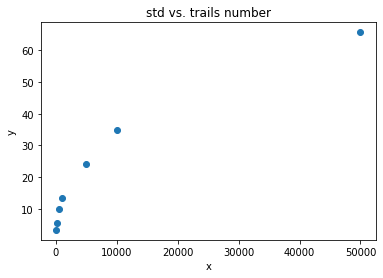

In [13]:
make_plot(trails,std, 'std vs. trails number')
#To be honest, it seems more like a sqrt(x) function, and the range of one std increases with trail number.